In [1]:
# manage data and fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# first part with least squares
from scipy.optimize import curve_fit

# second part about ODR
from scipy.odr import ODR, Model, Data, RealData

# style and notebook integration of the plots
import seaborn as sns
%matplotlib inline 
sns.set(style="whitegrid", font_scale=2)

from math import sqrt,pi,exp

# I. Fichier 2018-11 JMT Li-rich NMC Pristine-csp-22112018.TXT

## Informations générales

Importation du fichier.

In [2]:
df = pd.read_csv(
    "2018-11 JMT Li-rich NMC Pristine-csp-22112018.TXT", 
    sep="\t",
    skiprows=3,
)

In [3]:
df

,KE_LiM3p_s MRSof/23,BE_LiM3p_s MRSof/23,CPS_LiM3p_s MRSof/23,Mn 3p_1_LiM3p_s MRSof/23,Mn 3p_2_LiM3p_s MRSof/23,Li 1s_3_LiM3p_s MRSof/23,Co 3p_4_LiM3p_s MRSof/23,Co 3p + Na2s_5_LiM3p_s MRSof/23,Ni 3p_6_LiM3p_s MRSof/23,Ni 3p_7_LiM3p_s MRSof/23,Ni 3p_8_LiM3p_s MRSof/23,Mn 3s_9_LiM3p_s MRSof/23,Mn 3s_10_LiM3p_s MRSof/23,Li 1s7_11_LiM3p_s MRSof/23,Ni 3p_12_LiM3p_s MRSof/23,Background_LiM3p_s MRSof/23,Envelope_LiM3p_s MRSof/23
0,1390.79,95.9,175.30,175.30,175.3000,175.30,175.30,175.30,175.30,175.30,175.30,175.30,175.318,175.30,175.30,175.30,175.3180
1,1390.89,95.8,175.90,175.90,175.9000,175.90,175.90,175.90,175.90,175.90,175.90,175.90,175.922,175.90,175.90,175.90,175.9220
2,1390.99,95.7,180.85,180.85,180.8500,180.85,180.85,180.85,180.85,180.85,180.85,180.85,180.876,180.85,180.85,180.85,180.8760
3,1391.09,95.6,180.75,180.75,180.7500,180.75,180.75,180.75,180.75,180.75,180.75,180.75,180.781,180.75,180.75,180.75,180.7810
4,1391.19,95.5,178.35,178.35,178.3500,178.35,178.35,178.35,178.35,178.35,178.35,178.35,178.388,178.35,178.35,178.35,178.3880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1443.39,43.3,60.40,60.40,60.4040,60.40,60.40,60.40,60.40,60.40,60.40,60.40,60.400,60.40,60.40,60.40,60.4040
527,1443.49,43.2,61.20,61.20,61.2032,61.20,61.20,61.20,61.20,61.20,61.20,61.20,61.200,61.20,61.20,61.20,61.2032
528,1443.59,43.1,62.65,62.65,62.6525,62.65,62.65,62.65,62.65,62.65,62.65,62.65,62.650,62.65,62.65,62.65,62.6525
529,1443.69,43.0,63.25,63.25,63.2520,63.25,63.25,63.25,63.25,63.25,63.25,63.25,63.250,63.25,63.25,63.25,63.2520


KE représente l'énergie cinétique (expérimentale)
BE représente l'énergie de liaison (expérimentale)
CPS représente le signal expérimental
Background représente le bruit de fond (expérimental)
Envelope représente la forme des données expérimentales (traitement) 

On veut tracer le graphique de CPS et de l'enveloppe en fonction du BE tout en enlevant le Background.

On met BE en index.

In [4]:
ddf = df.set_index("BE_LiM3p_s MRSof/23")
ddf

,KE_LiM3p_s MRSof/23,CPS_LiM3p_s MRSof/23,Mn 3p_1_LiM3p_s MRSof/23,Mn 3p_2_LiM3p_s MRSof/23,Li 1s_3_LiM3p_s MRSof/23,Co 3p_4_LiM3p_s MRSof/23,Co 3p + Na2s_5_LiM3p_s MRSof/23,Ni 3p_6_LiM3p_s MRSof/23,Ni 3p_7_LiM3p_s MRSof/23,Ni 3p_8_LiM3p_s MRSof/23,Mn 3s_9_LiM3p_s MRSof/23,Mn 3s_10_LiM3p_s MRSof/23,Li 1s7_11_LiM3p_s MRSof/23,Ni 3p_12_LiM3p_s MRSof/23,Background_LiM3p_s MRSof/23,Envelope_LiM3p_s MRSof/23
BE_LiM3p_s MRSof/23,,,,,,,,,,,,,,,,
95.9,1390.79,175.30,175.30,175.3000,175.30,175.30,175.30,175.30,175.30,175.30,175.30,175.318,175.30,175.30,175.30,175.3180
95.8,1390.89,175.90,175.90,175.9000,175.90,175.90,175.90,175.90,175.90,175.90,175.90,175.922,175.90,175.90,175.90,175.9220
95.7,1390.99,180.85,180.85,180.8500,180.85,180.85,180.85,180.85,180.85,180.85,180.85,180.876,180.85,180.85,180.85,180.8760
95.6,1391.09,180.75,180.75,180.7500,180.75,180.75,180.75,180.75,180.75,180.75,180.75,180.781,180.75,180.75,180.75,180.7810
95.5,1391.19,178.35,178.35,178.3500,178.35,178.35,178.35,178.35,178.35,178.35,178.35,178.388,178.35,178.35,178.35,178.3880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43.3,1443.39,60.40,60.40,60.4040,60.40,60.40,60.40,60.40,60.40,60.40,60.40,60.400,60.40,60.40,60.40,60.4040
43.2,1443.49,61.20,61.20,61.2032,61.20,61.20,61.20,61.20,61.20,61.20,61.20,61.200,61.20,61.20,61.20,61.2032
43.1,1443.59,62.65,62.65,62.6525,62.65,62.65,62.65,62.65,62.65,62.65,62.65,62.650,62.65,62.65,62.65,62.6525


In [5]:
#plt.rcParams["font.size"] = 10

<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

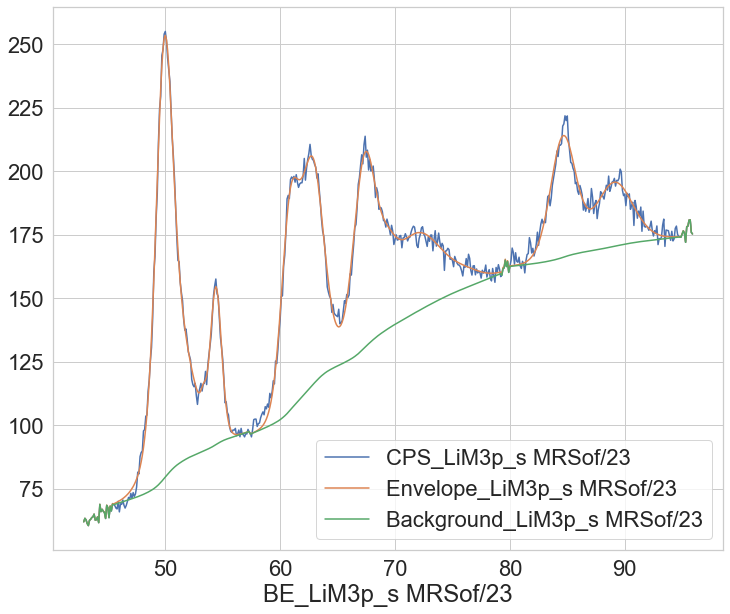

In [6]:
(ddf.iloc[:,[1,-1,-2]]).plot(figsize=(12, 10), legend=True
        )

On enlève le Background et on met les informations importantes dans un DataFrame "data".

In [7]:
#(ddf.iloc[:,[1]- ddf.iloc[:,-3]).plot(figsize=(12, 10), legend=True
#        )

In [8]:
data= pd.DataFrame()
CPS=(ddf["CPS_LiM3p_s MRSof/23"]- ddf["Background_LiM3p_s MRSof/23"])
ENV=(ddf["Envelope_LiM3p_s MRSof/23"]- ddf["Background_LiM3p_s MRSof/23"])
data["cps"]=CPS
data["enveloppe"]=ENV
data["be"]=data.index

In [9]:
data

,cps,enveloppe,be
BE_LiM3p_s MRSof/23,,,
95.9,0.0,0.0180,95.9
95.8,0.0,0.0220,95.8
95.7,0.0,0.0260,95.7
95.6,0.0,0.0310,95.6
95.5,0.0,0.0380,95.5
...,...,...,...
43.3,0.0,0.0040,43.3
43.2,0.0,0.0032,43.2
43.1,0.0,0.0025,43.1


Text(0, 0.5, 'Intensité')

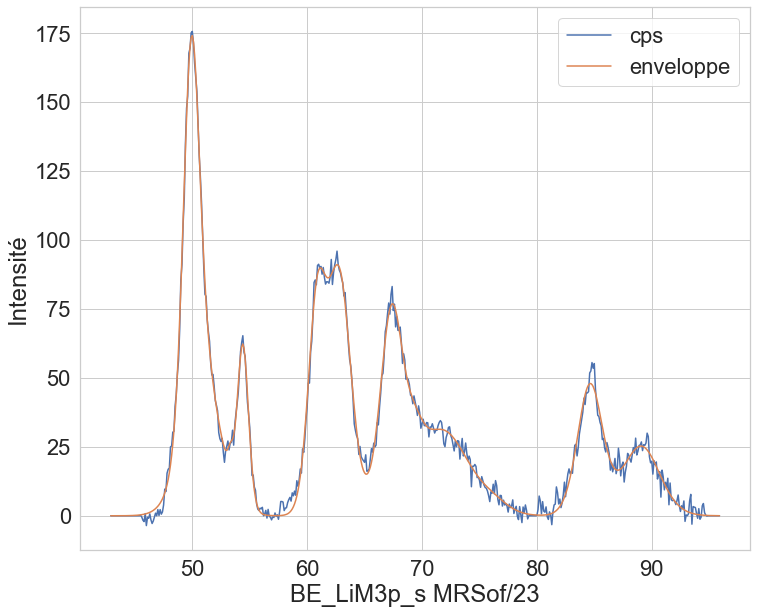

In [10]:
(data.iloc[:,[0,1]]).plot(figsize=(12, 10), legend=True)
plt.ylabel("Intensité")

Notre but est de faire une enveloppe la plus proche du signal.

## Première technique : découpage de la courbe

On découpe la courbe autour des pics principaux.

In [11]:
data1=data.loc[(data.index<53) & (data.index>=47)]

In [12]:
data1

,cps,enveloppe,be
BE_LiM3p_s MRSof/23,,,
52.9,23.5445,23.7395,52.9
52.8,19.3772,24.5552,52.8
52.7,23.0681,25.9441,52.7
52.6,28.0702,27.7192,52.6
52.5,26.9196,29.7456,52.5
52.4,27.9712,31.9482,52.4
52.3,30.1777,34.2907,52.3
52.2,38.0520,36.7690,52.2
52.1,40.0308,39.3958,52.1


In [13]:
data2=data.loc[(data.index<57) & (data.index>=53)]

In [14]:
data3=data.loc[(data.index<65) & (data.index>=57)]

In [15]:
data4=data.loc[(data.index<69.5) & (data.index>=65)]

In [16]:
data5=data.loc[(data.index<80) & (data.index>=69.5)]

In [17]:
data6=data.loc[(data.index<87) & (data.index>=80)]

In [18]:
data7=data.loc[(data.index<93) & (data.index>=87)]

Pour chaque partie du signal on modélise une gaussienne approximative en jouant sur les arguments : a représente la hauteur du pic, mu est la valeur sur laquel le pic est centr et sigma représente la largeur du pic.

In [19]:
def gaussienne(x,a,mu,sigma):
    return a*((1/(sqrt(2*pi)*sigma))*np.exp(-1/2*((x-mu)/sigma)**2))

On utilise ensuite curve_fit sur cette gausienne qui va permettre de trouver la gaussienne la plus proche du signal.

In [20]:
popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data1["be"],   # x data
    ydata=data1["cps"],   # y data
    p0=[400,50, 1],      # initial value of the parameters
)

Modélisation du premier pic.

[406.3866003   50.09103687   0.99677209]


C:\Users\mathi\AppData\Local\Temp/ipykernel_16300/3613794138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["teste"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

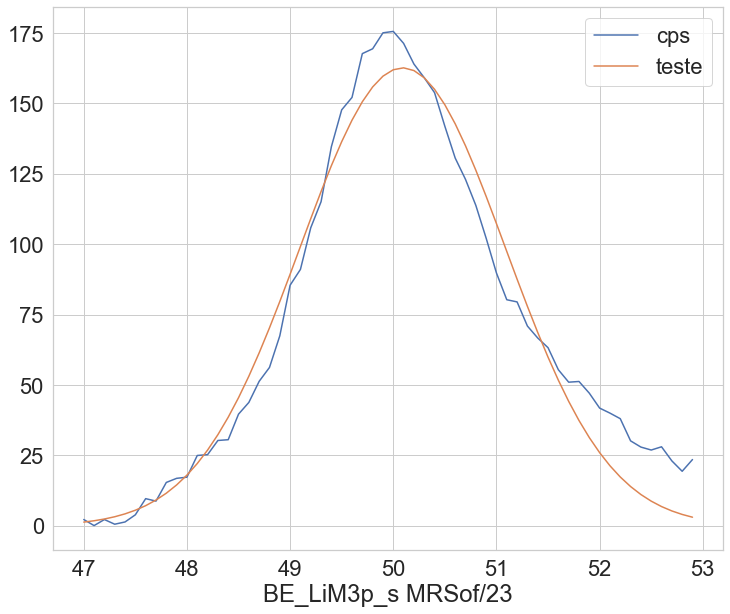

In [21]:
print(popt)
a=gaussienne(data1["be"],popt[0],popt[1],popt[2])
data1["teste"]=a
(data1.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

Modélisation du deuxième pic.

In [22]:
popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data2["be"],   # x data
    ydata=data2["cps"],   # y data
    p0=[50,56, 1],      # initial value of the parameters
)

[96.75219612 54.2689149   0.67714019]


C:\Users\mathi\AppData\Local\Temp/ipykernel_16300/2191914418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["teste"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

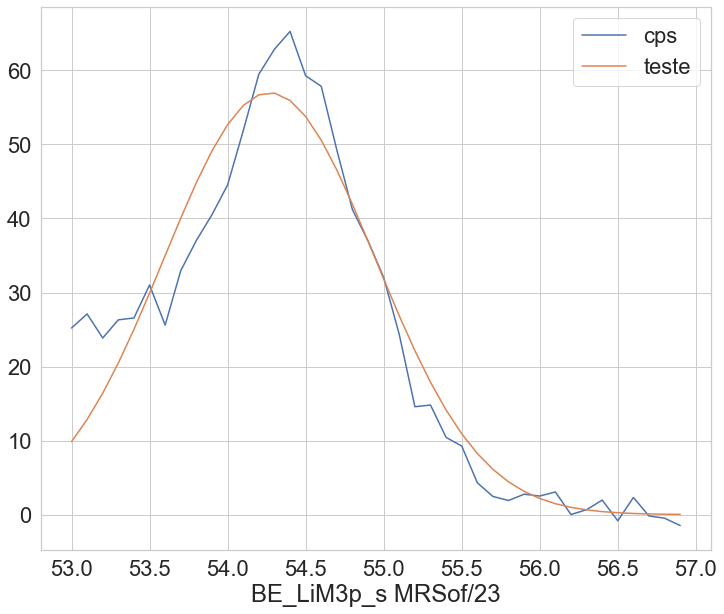

In [23]:
print(popt)
a=gaussienne(data2["be"],popt[0],popt[1],popt[2])
data2["teste"]=a
(data2.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

Modélisation du troisième pic.

In [24]:
popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data3["be"],   # x data
    ydata=data3["cps"],   # y data
    p0=[400,62, 1],      # initial value of the parameters
)

[383.18270704  62.02167138   1.5589287 ]


C:\Users\mathi\AppData\Local\Temp/ipykernel_16300/3541918726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["teste"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

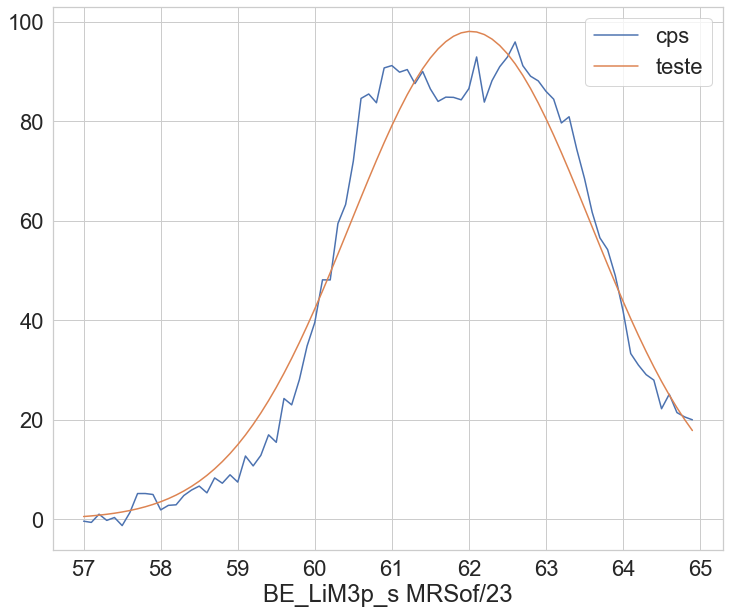

In [25]:
print(popt)
a=gaussienne(data3["be"],popt[0],popt[1],popt[2])
data3["teste"]=a
(data3.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

Modélisation du quatrième pic.

In [26]:
popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data4["be"],   # x data
    ydata=data4["cps"],   # y data
    p0=[400,67, 1],      # initial value of the parameters
)

[245.95924104  67.63174093   1.32920435]


C:\Users\mathi\AppData\Local\Temp/ipykernel_16300/131197453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4["teste"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

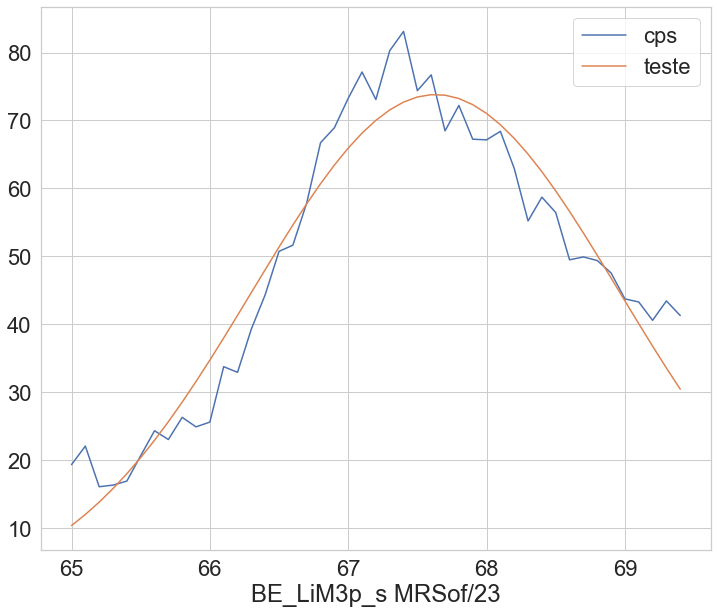

In [27]:
print(popt)
a=gaussienne(data4["be"],popt[0],popt[1],popt[2])
data4["teste"]=a
(data4.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

Modélisation du cinquième pic.

In [28]:
popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data5["be"],   # x data
    ydata=data5["cps"],   # y data
    p0=[400,72, 1],      # initial value of the parameters
)

[306.17336561  70.22504854   3.54786695]


C:\Users\mathi\AppData\Local\Temp/ipykernel_16300/2208640348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5["teste"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

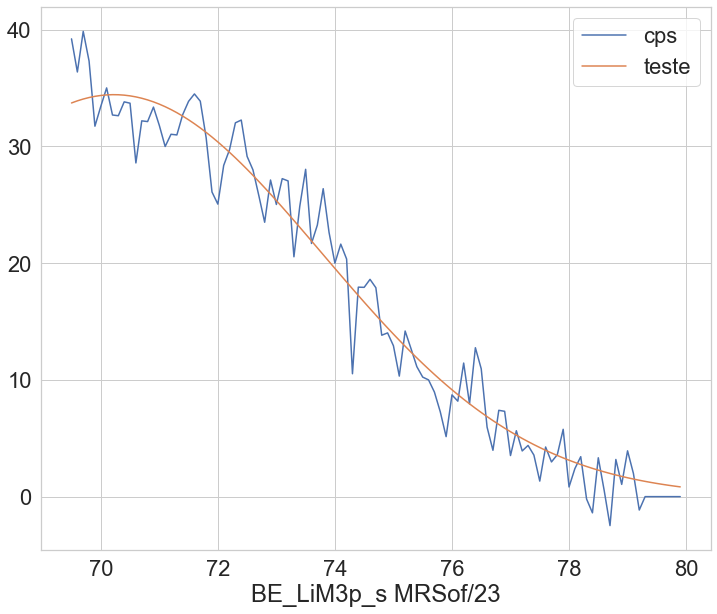

In [29]:
print(popt)
a=gaussienne(data5["be"],popt[0],popt[1],popt[2])
data5["teste"]=a
(data5.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

Modélisation du sixième pic.

In [30]:
popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data6["be"],   # x data
    ydata=data6["cps"],   # y data
    p0=[400,84, 1],      # initial value of the parameters
)

[144.32001683  84.7376215    1.23513855]


C:\Users\mathi\AppData\Local\Temp/ipykernel_16300/1593028399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6["teste"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

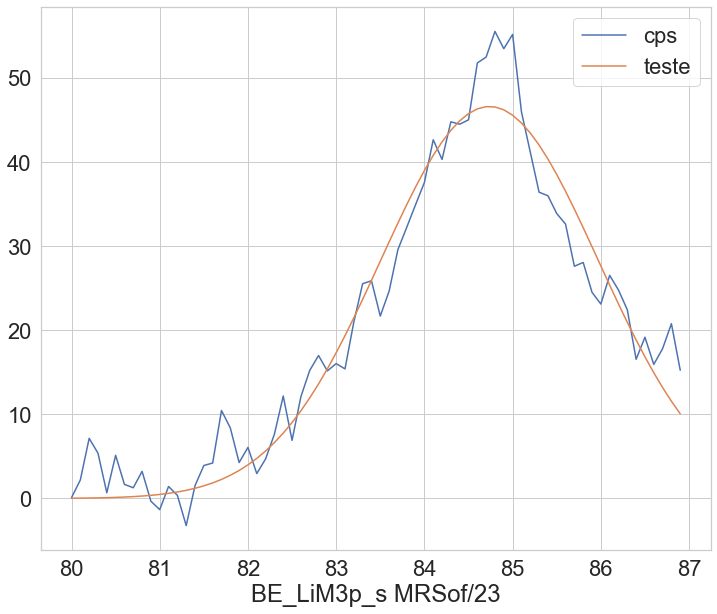

In [31]:
print(popt)
a=gaussienne(data6["be"],popt[0],popt[1],popt[2])
data6["teste"]=a
(data6.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

Modélisation du septième pic.

In [32]:
popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data7["be"],   # x data
    ydata=data7["cps"],   # y data
    p0=[400,90, 1],      # initial value of the parameters
)

[113.11466532  88.88854851   1.80722943]


C:\Users\mathi\AppData\Local\Temp/ipykernel_16300/2256185688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data7["teste"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

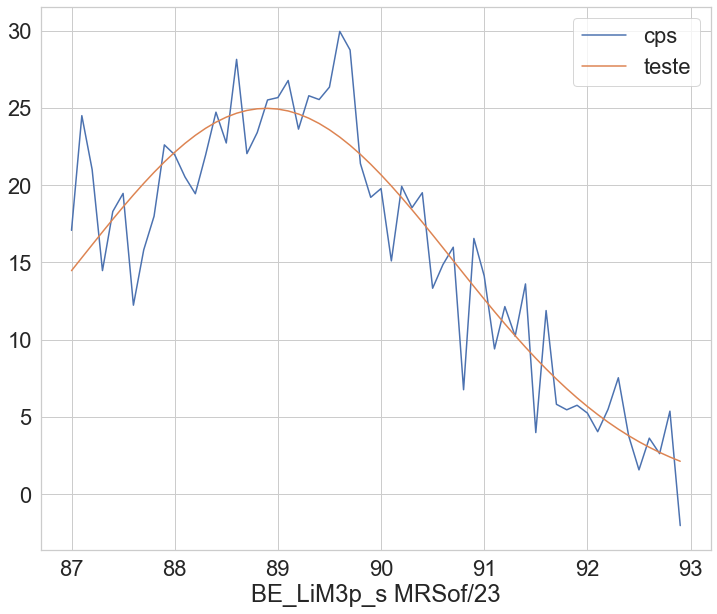

In [33]:
print(popt)
a=gaussienne(data7["be"],popt[0],popt[1],popt[2])
data7["teste"]=a
(data7.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

Ensuite on concatène les 7 gaussiennes obtenues.

In [34]:
data = pd.concat([data1, data2, data3, data4, data5, data6, data7], ignore_index=False, sort=False)

In [35]:
data = data.sort_index()

In [36]:
data

,cps,enveloppe,be,teste
BE_LiM3p_s MRSof/23,,,,
47.0,2.2448,3.4574,47.0,1.327575
47.1,0.0883,3.9868,47.1,1.802961
47.2,2.2364,4.5987,47.2,2.424056
47.3,0.5793,5.3082,47.3,3.226471
47.4,1.3757,6.1343,47.4,4.251495
...,...,...,...,...
92.5,1.5690,3.1330,92.5,3.390561
92.6,3.6210,2.7980,92.6,3.030992
92.7,2.6180,2.4910,92.7,2.701272


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

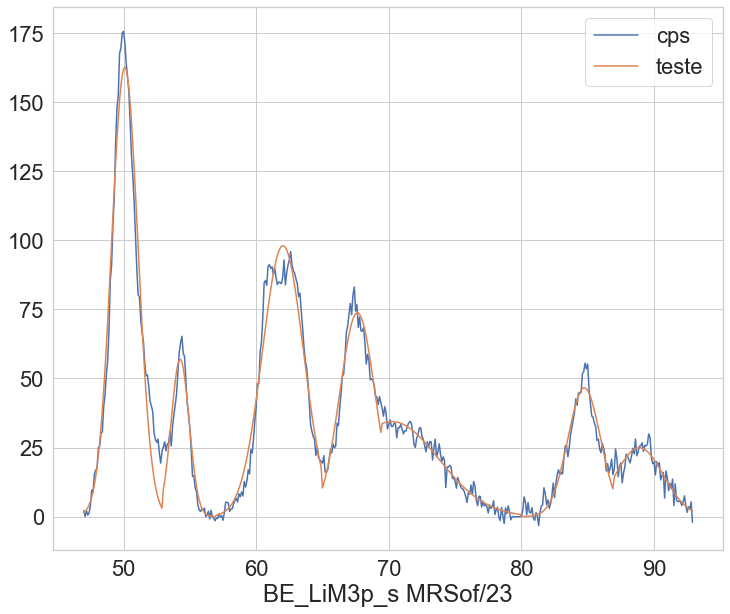

In [37]:
(data.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

On obtient une figure ressemblant à notre objectif mais il y a des écarts au niveau de la jointure des courbes.

## Deuxième technique : fit_curv sur la somme des gaussiennes

#### Trois gaussiennes

On veut modéliser le signal par trois gaussiennes, tout d'abort, on créé un fonction faisant la somme de trois gaussiennes.

In [38]:
def trois_gaussiennes (x,a1,a2,a3,mu1,mu2,mu3,sigma1,sigma2,sigma3):
    return gaussienne(x,a1,mu1,sigma1)+gaussienne(x,a2,mu2,sigma2)+gaussienne(x,a3,mu3,sigma3)

On choisit des valeurs approximatives.

In [39]:
mu=[50,65,87]
a=[400,400,400]
sigma=[2,2,2]

Puis on fait un fit_curv sur la somme des gaussiennes pour avoir trois gaussiennes au plus près du signal.

In [40]:
popt, pcov = curve_fit(
    f=trois_gaussiennes,       # model function
    xdata=data["be"],   # x data
    ydata=data["cps"],   # y data
    p0=[a,mu, sigma],      # initial value of the parameters
)

[387.31997316 880.84311106 240.7117972   50.06638077  64.61766145
  86.08802443   0.95813387   5.98874445   2.93476242]


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

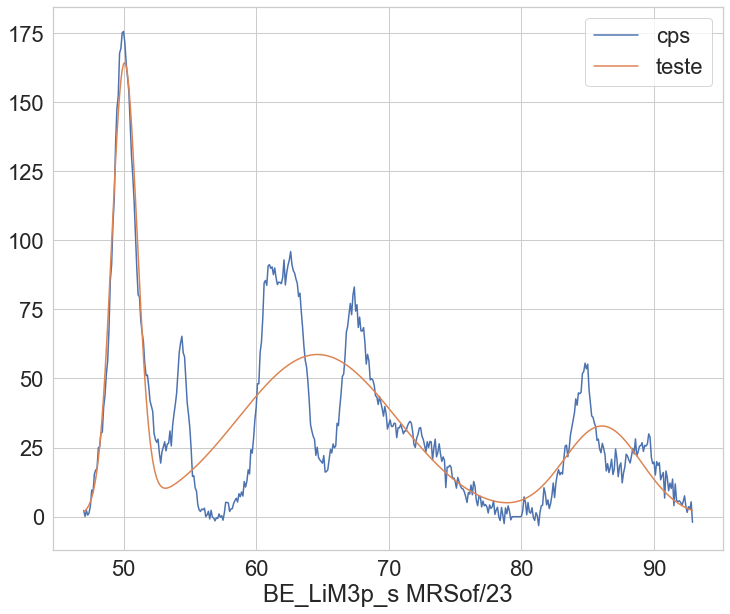

In [41]:
print(popt)
g=trois_gaussiennes(data["be"],popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6],popt[7],popt[8])
data["teste"]=g
(data.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

Essayons d'être plus précis en faisant la somme de huit gaussiennes.

### Huit gaussiennes

In [42]:
def huit_gaussiennes (x,a1,a2,a3,a4,a5,a6,a7,a8,mu1,mu2,mu3,mu4,mu5,mu6,mu7,mu8,sigma1,sigma2,sigma3,sigma4,sigma5,sigma6,sigma7,sigma8):
    return gaussienne(x,a1,mu1,sigma1)+gaussienne(x,a2,mu2,sigma2)+gaussienne(x,a3,mu3,sigma3)+gaussienne(x,a4,mu4,sigma4)+gaussienne(x,a5,mu5,sigma5)+gaussienne(x,a6,mu6,sigma6)+gaussienne(x,a7,mu7,sigma7)+gaussienne(x,a8,mu8,sigma8)

In [43]:
mu=[50,55,61,62,68,71,84,89]
a=[400,200,200,200,200,60,150,60]
sigma=[1,1,1,1,1,2,1,2]

In [44]:
popt, pcov = curve_fit(
    f=huit_gaussiennes,       # model function
    xdata=data["be"],   # x data
    ydata=data["cps"],   # y data
    p0=[a,mu, sigma],      # initial value of the parameters
)

[400.53652962 112.01082491 165.46958988 170.10688998 106.35688689
 320.91392176 130.13121006 103.83202231  50.07875387  54.14634157
  60.94771834  62.86593581  67.41795129  70.04319067  84.62884189
  89.04909883   0.97257439   0.88288897   0.82247078   0.84937369
   0.84125704   3.67363477   1.10876843   1.64391849]


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

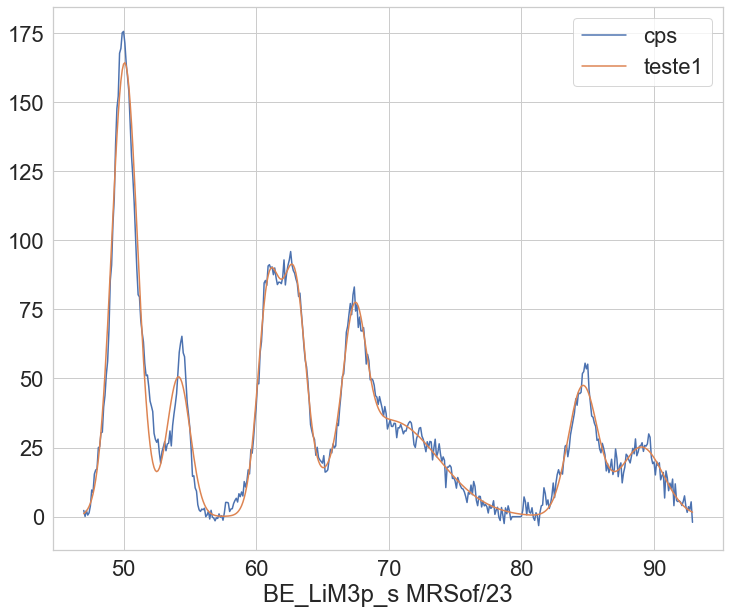

In [45]:
print(popt)
g=huit_gaussiennes(data["be"],popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6],popt[7],popt[8],popt[9],popt[10],popt[11],popt[12],popt[13],popt[14],popt[15],popt[16],popt[17],popt[18],popt[19],popt[20],popt[21],popt[22],popt[23])
data["teste1"]=g
(data.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

On obtient un résultat proche de notre objectif, avec encore quelques écarts mais la courbe est plus réaliste.

### Automatisé

On voudrait pouvoir réaliser cette technique avec plus de gaussiennes afin de se rapprocher du signal, pour cela il nous faut automatiser les calculs.

In [46]:
def somme_gaussiennes (x,*args):
    longueur = len(args)/3
    res=0
    for i in range(int(longueur)):
        res = res + gaussienne(x, args[i],args[i+int(longueur)],args[i+2*int(longueur)])
    return res

<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

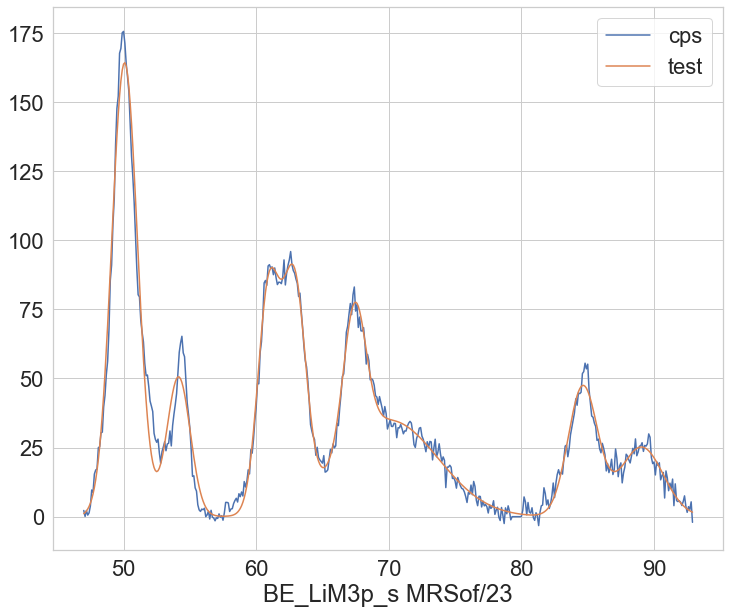

In [47]:
mu=[50,55,61,62,68,71,84,89]
a=[400,200,200,200,200,60,150,60]
sigma=[1,1,1,1,1,2,1,2]
popt, pcov = curve_fit(
    f=somme_gaussiennes,       # model function
    xdata=data["be"],   # x data
    ydata=data["cps"],   # y data
    p0=[a,mu, sigma],      # initial value of the parameters
)

data["test"]=somme_gaussiennes(data["be"],*popt)
(data.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

</br>
</br>
</br>

# II. Fichier Amiens Lirich-NMC 02-Li-ric-pristine-26062014 Métaux3p-Li1s.TXT

In [48]:
df = pd.read_csv(
    "Amiens Lirich-NMC 02-Li-ric-pristine-26062014 Métaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [49]:
df

,KE_Metaux3p-Li1s/15,BE_Metaux3p-Li1s/15,CPS_Metaux3p-Li1s/15,Mn 3p_1_Metaux3p-Li1s/15,Mn 3p_2_Metaux3p-Li1s/15,Li 1s_3_Metaux3p-Li1s/15,Co 3p_4_Metaux3p-Li1s/15,Co 3p_5_Metaux3p-Li1s/15,Ni 3p Ni2+_6_Metaux3p-Li1s/15,Ni 3p Ni2+_7_Metaux3p-Li1s/15,Ni 3p Ni2+_8_Metaux3p-Li1s/15,Li 1s_9_Metaux3p-Li1s/15,Background_Metaux3p-Li1s/15,Envelope_Metaux3p-Li1s/15
0,1409.26,77.4275,98.2906,98.2906,98.2906,98.2906,98.2906,98.2906,98.2906,98.2906,98.7879,98.2906,98.2906,98.7879
1,1409.36,77.3275,100.4270,100.4270,100.4270,100.4270,100.4270,100.4270,100.4270,100.4270,100.9730,100.4270,100.4270,100.9730
2,1409.46,77.2275,101.6670,101.6670,101.6670,101.6670,101.6670,101.6670,101.6670,101.6670,102.2640,101.6670,101.6670,102.2640
3,1409.56,77.1275,98.5897,100.5150,100.5150,100.5150,100.5150,100.5150,100.5150,100.5150,101.1670,100.5150,100.5150,101.1670
4,1409.66,77.0275,101.3250,100.4010,100.4010,100.4010,100.4010,100.4010,100.4010,100.4010,101.1140,100.4010,100.4010,101.1140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,1440.86,45.8275,44.4444,44.4458,44.4445,44.4444,44.4444,44.4444,44.4444,44.4444,44.4444,44.4444,44.4444,44.4458
317,1440.96,45.7275,45.5128,45.5136,45.5128,45.5128,45.5128,45.5128,45.5128,45.5128,45.5128,45.5128,45.5128,45.5136
318,1441.06,45.6275,43.5897,43.5902,43.5898,43.5897,43.5897,43.5897,43.5897,43.5897,43.5897,43.5897,43.5897,43.5902
319,1441.16,45.5275,42.8632,42.8635,42.8633,42.8632,42.8632,42.8632,42.8632,42.8632,42.8632,42.8632,42.8632,42.8635


In [50]:
ddf = df.set_index("BE_Metaux3p-Li1s/15")

In [51]:
data= pd.DataFrame()
CPS=(ddf["CPS_Metaux3p-Li1s/15"]- ddf["Background_Metaux3p-Li1s/15"])
ENV=(ddf["Envelope_Metaux3p-Li1s/15"]- ddf["Background_Metaux3p-Li1s/15"])
data["cps"]=CPS
data["enveloppe"]=ENV
data["be"]=data.index

Text(0, 0.5, 'Intensité')

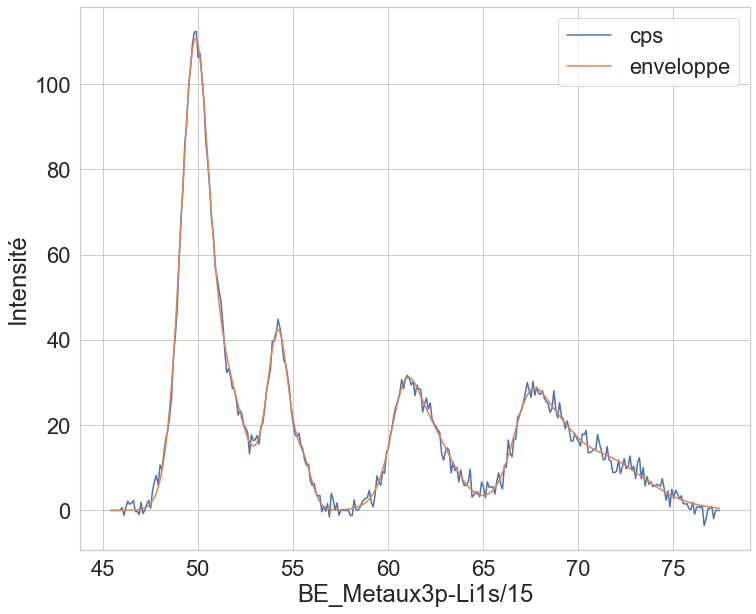

In [52]:
(data.iloc[:,[0,1]]).plot(figsize=(12, 10), legend=True)
plt.ylabel("Intensité")

<AxesSubplot:xlabel='BE_Metaux3p-Li1s/15'>

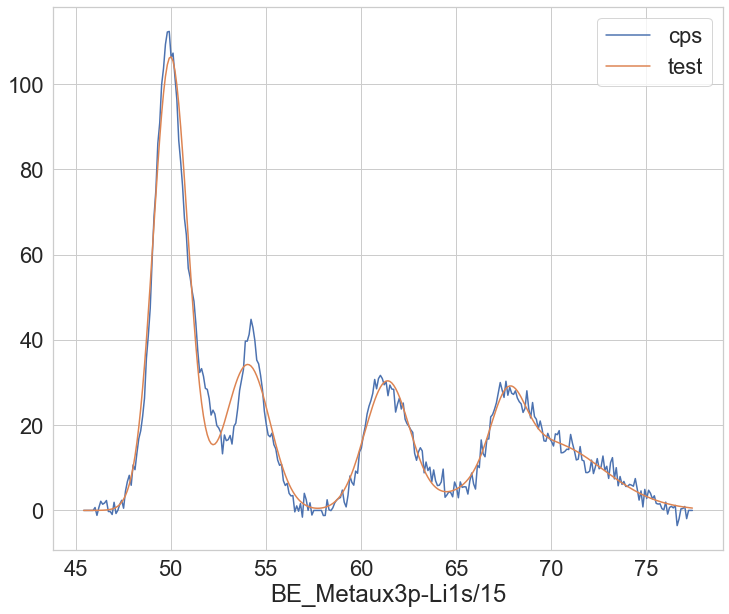

In [53]:
mu=[50,54,62,68,72]
a=[110,42,30,30,10]
sigma=[1,1,1,1,1]
popt, pcov = curve_fit(
    f=somme_gaussiennes,       # model function
    xdata=data["be"],   # x data
    ydata=data["cps"],   # y data
    p0=[a,mu, sigma],      # initial value of the parameters
)

data["test"]=somme_gaussiennes(data["be"],*popt)
(data.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

</br>
</br>
</br>

# III. Fichier ANR Int 5V electrode reference LNM Metaux3p-Li1s.TXT

In [54]:
df = pd.read_csv(
    "ANR Int 5V electrode reference LNM Metaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [55]:
df

,KE_Ni3p-Li1s-Mn3p/24,BE_Ni3p-Li1s-Mn3p/24,CPS_Ni3p-Li1s-Mn3p/24,Mn 3p_1_Ni3p-Li1s-Mn3p/24,Mn 3p_2_Ni3p-Li1s-Mn3p/24,Mn 3p_3_Ni3p-Li1s-Mn3p/24,Li 1s_4_Ni3p-Li1s-Mn3p/24,Ni 3p_5_Ni3p-Li1s-Mn3p/24,Ni 3p_6_Ni3p-Li1s-Mn3p/24,Mn 3p_7_Ni3p-Li1s-Mn3p/24,Ni 3p_8_Ni3p-Li1s-Mn3p/24,Background_Ni3p-Li1s-Mn3p/24,Envelope_Ni3p-Li1s-Mn3p/24
0,1408.58,78.11,141.5280,141.5280,141.5280,141.5280,141.5280,141.5280,141.6100,141.5280,141.5280,141.5280,141.6100
1,1408.68,78.01,141.0420,141.0420,141.0420,141.0420,141.0420,141.0420,141.1370,141.0420,141.0420,141.0420,141.1370
2,1408.78,77.91,140.4860,140.4860,140.4860,140.4860,140.4860,140.4860,140.5960,140.4860,140.4860,140.4860,140.5960
3,1408.88,77.81,140.0690,140.0690,140.0690,140.0690,140.0690,140.0690,140.1970,140.0690,140.0690,140.0690,140.1970
4,1408.98,77.71,141.5280,141.5280,141.5280,141.5280,141.5280,141.5280,141.6750,141.5280,141.5280,141.5280,141.6750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,1441.18,45.51,52.5694,55.1112,55.0695,55.0694,55.0694,55.0694,55.0694,55.0694,55.0694,55.0694,55.1112
327,1441.28,45.41,55.0694,55.0960,55.0695,55.0694,55.0694,55.0694,55.0694,55.0694,55.0694,55.0694,55.0960
328,1441.38,45.31,52.3611,52.3777,52.3611,52.3611,52.3611,52.3611,52.3611,52.3611,52.3611,52.3611,52.3777
329,1441.48,45.21,52.5000,52.5103,52.5000,52.5000,52.5000,52.5000,52.5000,52.5000,52.5000,52.5000,52.5103


In [56]:
ddf = df.set_index("BE_Ni3p-Li1s-Mn3p/24")

In [57]:
data= pd.DataFrame()
CPS=(ddf["CPS_Ni3p-Li1s-Mn3p/24"]- ddf["Background_Ni3p-Li1s-Mn3p/24"])
ENV=(ddf["Envelope_Ni3p-Li1s-Mn3p/24"]- ddf["Background_Ni3p-Li1s-Mn3p/24"])
data["cps"]=CPS
data["enveloppe"]=ENV
data["be"]=data.index

Text(0, 0.5, 'Intensité')

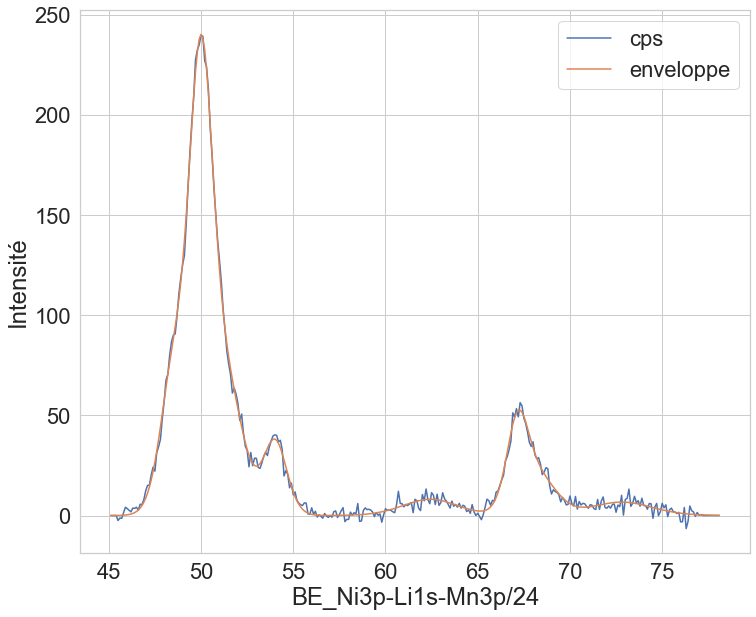

In [58]:
(data.iloc[:,[0,1]]).plot(figsize=(12, 10), legend=True)
plt.ylabel("Intensité")

<AxesSubplot:xlabel='BE_Ni3p-Li1s-Mn3p/24'>

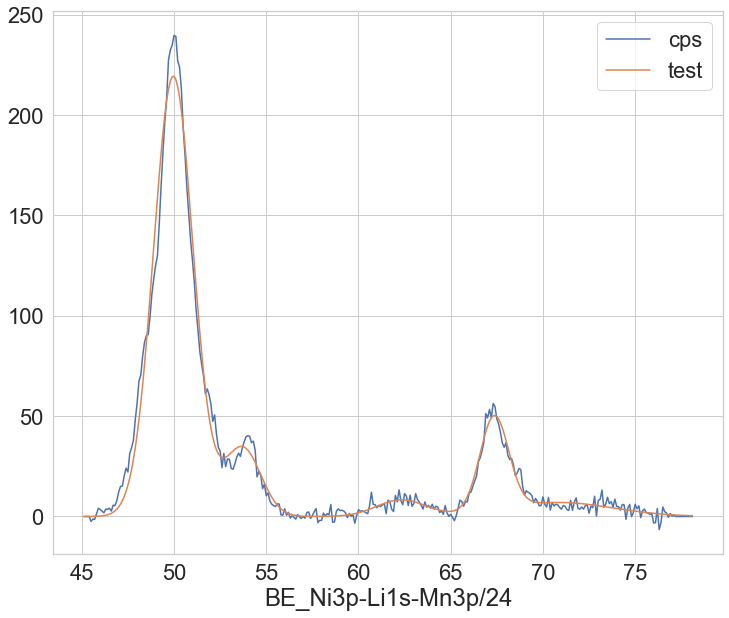

In [59]:
mu=[50,54,62,67,72]
a=[240,40,10,50,10]
sigma=[2,1,2,1,2]
popt, pcov = curve_fit(
    f=somme_gaussiennes,       # model function
    xdata=data["be"],   # x data
    ydata=data["cps"],   # y data
    p0=[a,mu, sigma],      # initial value of the parameters
)

data["test"]=somme_gaussiennes(data["be"],*popt)
(data.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

</br>
</br>
</br>

# IV. Fichier Barboux Lirich-NMC SD100-01072016 Métaux3p-Li1s.TXT

In [60]:
df = pd.read_csv(
    "Barboux Lirich-NMC SD100-01072016 Métaux3p-Li1s.TXT", 
    sep="\t",
    skiprows=3,
)

In [61]:
df

,KE_Li-Metau MRSon/27,BE_Li-Metau MRSon/27,CPS_Li-Metau MRSon/27,Mn 3p_1_Li-Metau MRSon/27,Mn 3p_2_Li-Metau MRSon/27,Li 1s_3_Li-Metau MRSon/27,Co 3p_4_Li-Metau MRSon/27,Co 3p_5_Li-Metau MRSon/27,Ni 3p_6_Li-Metau MRSon/27,Ni 3p_7_Li-Metau MRSon/27,Ni 3p_8_Li-Metau MRSon/27,Mn 3s_9_Li-Metau MRSon/27,Mn 3s_10_Li-Metau MRSon/27,Background_Li-Metau MRSon/27,Envelope_Li-Metau MRSon/27
0,1391.67,95.0226,144.8570,144.8570,144.8570,144.8570,144.8570,144.8570,144.8570,144.8570,144.8570,144.8570,144.9330,144.8570,144.9330
1,1391.77,94.9226,143.6190,143.4920,143.4920,143.4920,143.4920,143.4920,143.4920,143.4920,143.4920,143.4920,143.5810,143.4920,143.5810
2,1391.87,94.8226,142.0000,143.4290,143.4290,143.4290,143.4290,143.4290,143.4290,143.4290,143.4290,143.4290,143.5350,143.4290,143.5350
3,1391.97,94.7226,145.6670,143.3650,143.3650,143.3650,143.3650,143.3650,143.3650,143.3650,143.3650,143.3650,143.4890,143.3650,143.4890
4,1392.07,94.6226,143.1430,143.3050,143.3050,143.3050,143.3050,143.3050,143.3050,143.3050,143.3050,143.3050,143.4510,143.3050,143.4510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1442.27,44.4226,41.9524,41.9524,41.9524,41.9524,41.9524,41.9524,41.9524,41.9524,41.9524,41.9524,41.9524,41.9524,41.9524
507,1442.37,44.3226,41.8095,41.8095,41.8095,41.8095,41.8095,41.8095,41.8095,41.8095,41.8095,41.8095,41.8095,41.8095,41.8095
508,1442.47,44.2226,39.9524,39.9524,39.9524,39.9524,39.9524,39.9524,39.9524,39.9524,39.9524,39.9524,39.9524,39.9524,39.9524
509,1442.57,44.1226,42.2381,42.2381,42.2381,42.2381,42.2381,42.2381,42.2381,42.2381,42.2381,42.2381,42.2381,42.2381,42.2381


In [62]:
ddf = df.set_index("BE_Li-Metau MRSon/27")

In [63]:
data= pd.DataFrame()
CPS=(ddf["CPS_Li-Metau MRSon/27"]- ddf["Background_Li-Metau MRSon/27"])
ENV=(ddf["Envelope_Li-Metau MRSon/27"]- ddf["Background_Li-Metau MRSon/27"])
data["cps"]=CPS
data["enveloppe"]=ENV
data["be"]=data.index

Text(0, 0.5, 'Intensité')

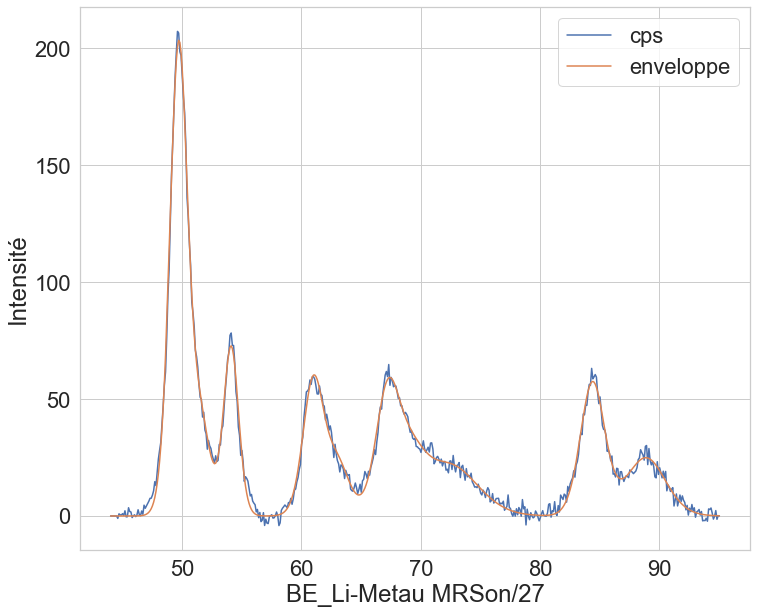

In [64]:
(data.iloc[:,[0,1]]).plot(figsize=(12, 10), legend=True)
plt.ylabel("Intensité")

<AxesSubplot:xlabel='BE_Li-Metau MRSon/27'>

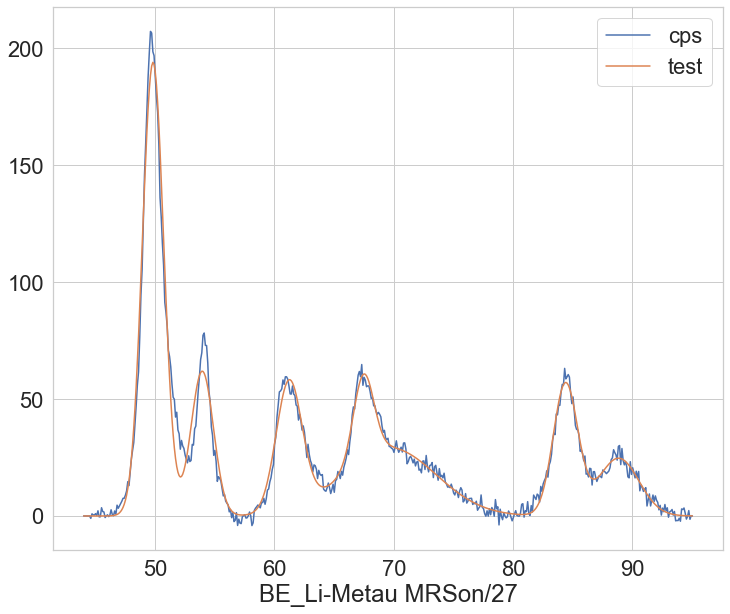

In [65]:
mu=[50,54,62,68,72,85,89]
a=[200,75,60,60,25,60,30]
sigma=[1,1,1,1,2,1,1]
popt, pcov = curve_fit(
    f=somme_gaussiennes,       # model function
    xdata=data["be"],   # x data
    ydata=data["cps"],   # y data
    p0=[a,mu, sigma],      # initial value of the parameters
)

data["test"]=somme_gaussiennes(data["be"],*popt)
(data.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

</br>
</br>
</br>

# V. Fichier Thèse Nath NMC1--TEST140-fit Métaux3p-Li1s.TXT

In [66]:
df = pd.read_csv(
    "Thèse Nath NMC1--TEST140-fit Métaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [67]:
df

,KE_Li 1s/17,BE_Li 1s/17,CPS_Li 1s/17,Co 3p_1_Li 1s/17,Ni 3p_2_Li 1s/17,Ni 3p_3_Li 1s/17,Ni 3p_4_Li 1s/17,Mn 3p_5_Li 1s/17,Co 3p_6_Li 1s/17,Mn 3p_7_Li 1s/17,Li 1s_8_Li 1s/17,Li 1s_9_Li 1s/17,Ni 3p_10_Li 1s/17,Background_Li 1s/17,Envelope_Li 1s/17
0,1408.87,77.821,73.9167,73.9167,73.9167,73.9167,74.0741,73.9167,73.9167,73.9167,73.9167,73.9167,73.9567,73.9167,74.1141
1,1408.97,77.721,75.1667,75.1667,75.1667,75.1667,75.3419,75.1667,75.1667,75.1667,75.1667,75.1667,75.2157,75.1667,75.3909
2,1409.07,77.621,72.0000,72.0000,72.0000,72.0000,72.1953,72.0000,72.0000,72.0000,72.0000,72.0000,72.0599,72.0000,72.2551
3,1409.17,77.521,77.7500,77.7500,77.7500,77.7500,77.9669,77.7500,77.7500,77.7500,77.7500,77.7500,77.8228,77.7500,78.0398
4,1409.27,77.421,75.3333,75.3333,75.3333,75.3333,75.5739,75.3333,75.3333,75.3333,75.3333,75.3333,75.4215,75.3333,75.6621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1438.57,48.121,34.0833,31.5636,31.5636,31.5636,31.5636,33.0987,31.5636,35.3436,31.5636,31.5636,31.5636,31.5636,36.8787
298,1438.67,48.021,34.9167,31.5243,31.5243,31.5243,31.5243,32.7902,31.5243,34.3267,31.5243,31.5243,31.5243,31.5243,35.5926
299,1438.77,47.921,34.2500,31.4858,31.4858,31.4858,31.4858,32.5213,31.4858,33.5356,31.4858,31.4858,31.4858,31.4858,34.5711
300,1438.87,47.821,31.3333,31.4512,31.4512,31.4512,31.4512,32.2945,31.4512,32.9250,31.4512,31.4512,31.4512,31.4512,33.7683


In [68]:
ddf = df.set_index("BE_Li 1s/17")

In [69]:
data= pd.DataFrame()
CPS=(ddf["CPS_Li 1s/17"]- ddf["Background_Li 1s/17"])
ENV=(ddf["Envelope_Li 1s/17"]- ddf["Background_Li 1s/17"])
data["cps"]=CPS
data["enveloppe"]=ENV
data["be"]=data.index

Text(0, 0.5, 'Intensité')

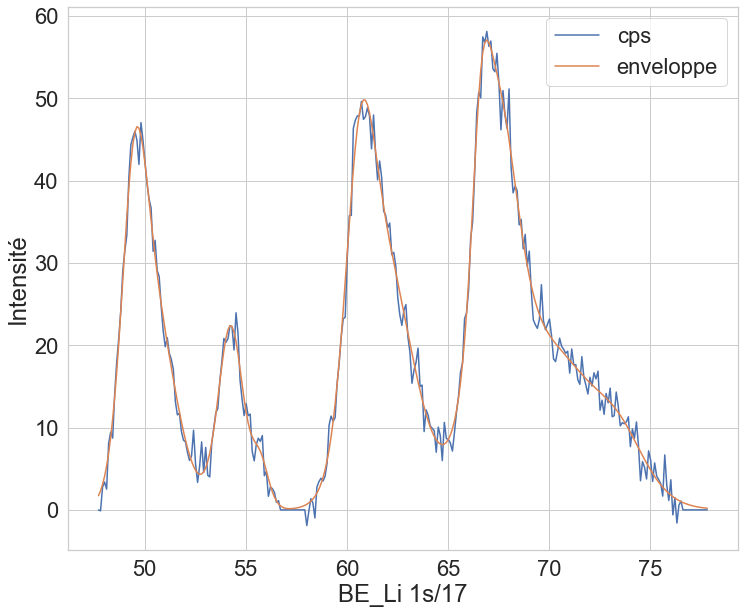

In [70]:
(data.iloc[:,[0,1]]).plot(figsize=(12, 10), legend=True)
plt.ylabel("Intensité")

<AxesSubplot:xlabel='BE_Li 1s/17'>

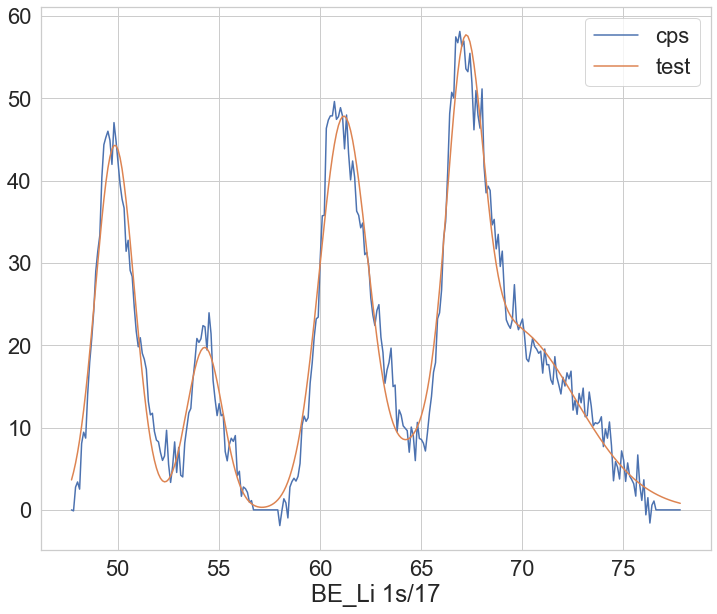

In [71]:
mu=[50,54,61,67,72]
a=[45,20,50,58,15]
sigma=[1,1,1,1,2]
popt, pcov = curve_fit(
    f=somme_gaussiennes,       # model function
    xdata=data["be"],   # x data
    ydata=data["cps"],   # y data
    p0=[a,mu, sigma],      # initial value of the parameters
)

data["test"]=somme_gaussiennes(data["be"],*popt)
(data.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

</br>
</br>
</br>

# VI. Fichier Thèse Nath NMC-brut-080212-fi-nouvelle-detection-kratos Métaux3p-Li1s.TXT

In [72]:
df = pd.read_csv(
    "Thèse Nath NMC-brut-080212-fi-nouvelle-detection-kratos Métaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [73]:
df

,KE_Li 1s/19,BE_Li 1s/19,CPS_Li 1s/19,Ni 3p_1_Li 1s/19,Ni 3p_2_Li 1s/19,Ni 3p_3_Li 1s/19,Co 3p_4_Li 1s/19,Co 3p_5_Li 1s/19,Mn 3p_6_Li 1s/19,Mn 3p_7_Li 1s/19,Li 1s_8_Li 1s/19,Li 1s_9_Li 1s/19,Background_Li 1s/19,Envelope_Li 1s/19
0,1408.97,77.725,140.3330,141.3000,140.3330,140.3330,140.3330,140.3330,140.3330,140.3330,140.3330,140.3330,140.3330,141.3000
1,1409.07,77.625,137.8330,138.8980,137.8330,137.8330,137.8330,137.8330,137.8330,137.8330,137.8330,137.8330,137.8330,138.8980
2,1409.17,77.525,137.2500,138.8610,137.6900,137.6900,137.6900,137.6900,137.6900,137.6900,137.6900,137.6900,137.6900,138.8610
3,1409.27,77.425,133.1670,138.8140,137.5250,137.5250,137.5250,137.5250,137.5250,137.5250,137.5250,137.5250,137.5250,138.8140
4,1409.37,77.325,139.3330,138.7920,137.3760,137.3760,137.3760,137.3760,137.3760,137.3760,137.3760,137.3760,137.3760,138.7920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1438.67,48.025,60.0833,50.5554,50.5554,50.5554,50.5554,50.5554,51.7339,60.1644,50.5554,50.5554,50.5554,61.3429
298,1438.77,47.925,59.9167,50.4275,50.4275,50.4275,50.4275,50.4275,51.4038,57.9115,50.4275,50.4275,50.4275,58.8878
299,1438.87,47.825,60.0000,50.2993,50.2993,50.2993,50.2993,50.2993,51.1072,56.0571,50.2993,50.2993,50.2993,56.8650
300,1438.97,47.725,52.7500,50.1882,50.1882,50.1882,50.1882,50.1882,50.8520,54.5647,50.1882,50.1882,50.1882,55.2285


In [74]:
ddf = df.set_index("BE_Li 1s/19")

In [75]:
data= pd.DataFrame()
CPS=(ddf["CPS_Li 1s/19"]- ddf["Background_Li 1s/19"])
ENV=(ddf["Envelope_Li 1s/19"]- ddf["Background_Li 1s/19"])
data["cps"]=CPS
data["enveloppe"]=ENV
data["be"]=data.index

Text(0, 0.5, 'Intensité')

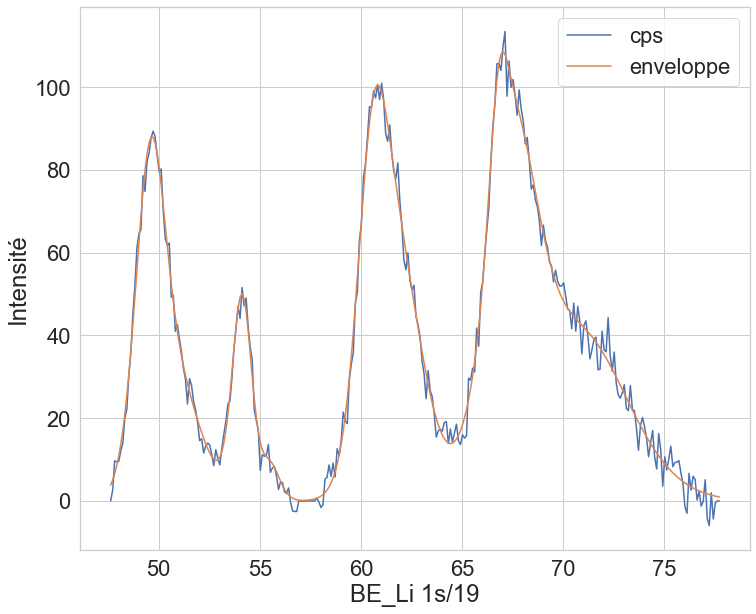

In [76]:
(data.iloc[:,[0,1]]).plot(figsize=(12, 10), legend=True)
plt.ylabel("Intensité")

<AxesSubplot:xlabel='BE_Li 1s/19'>

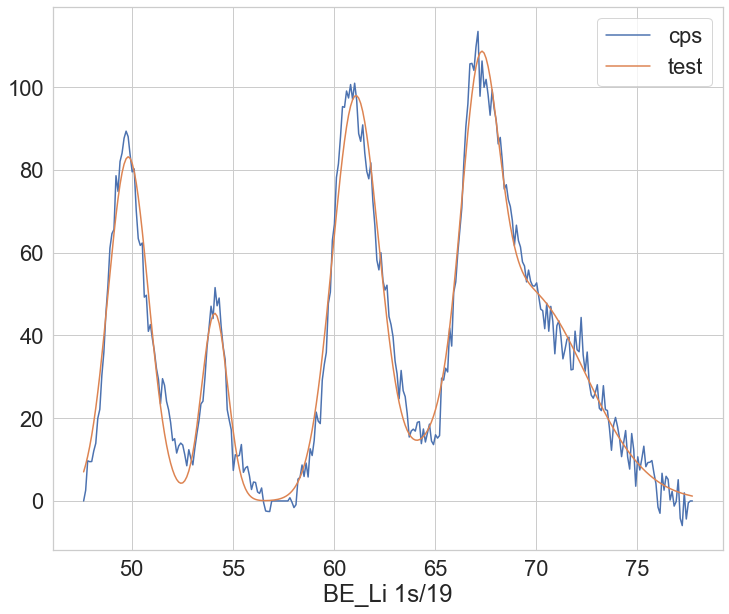

In [77]:
mu=[50,54,61,67,72]
a=[90,50,100,110,40]
sigma=[1,1,1,1,2]
popt, pcov = curve_fit(
    f=somme_gaussiennes,       # model function
    xdata=data["be"],   # x data
    ydata=data["cps"],   # y data
    p0=[a,mu, sigma],      # initial value of the parameters
)

data["test"]=somme_gaussiennes(data["be"],*popt)
(data.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

</br>
</br>
</br>

# VII. Fichier Thèse Nath NMCTEST79-fit Métaux3p-Li1s.TXT

In [78]:
df = pd.read_csv(
    "Thèse Nath NMCTEST79-fit Métaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [79]:
df

,KE_Li 1s/15,BE_Li 1s/15,CPS_Li 1s/15,Co 3p_1_Li 1s/15,Ni 3p_2_Li 1s/15,Mn 3p_3_Li 1s/15,Li 1s_4_Li 1s/15,Ni 3p_5_Li 1s/15,Ni 3p_6_Li 1s/15,Li 1s_7_Li 1s/15,Mn 3p_8_Li 1s/15,Co3p_9_Li 1s/15,Ni3p_10_Li 1s/15,Background_Li 1s/15,Envelope_Li 1s/15
0,1407.47,79.223,121.1330,121.1330,121.1330,121.1330,121.1330,121.1330,121.2900,121.1330,121.1330,121.1330,121.1330,121.1330,121.2910
1,1407.57,79.123,124.3330,124.3330,124.3330,124.3330,124.3330,124.3330,124.5100,124.3330,124.3330,124.3330,124.3340,124.3330,124.5110
2,1407.67,79.023,123.3000,123.3000,123.3000,123.3000,123.3000,123.3000,123.4990,123.3000,123.3000,123.3000,123.3000,123.3000,123.4990
3,1407.77,78.923,123.3330,123.3330,123.3330,123.3330,123.3330,123.3330,123.5560,123.3330,123.3330,123.3330,123.3340,123.3330,123.5570
4,1407.87,78.823,121.3670,121.3670,121.3670,121.3670,121.3670,121.3670,121.6170,121.3670,121.3670,121.3670,121.3680,121.3670,121.6180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,1440.07,46.623,40.3333,40.8111,40.8111,41.0100,40.8111,40.8111,40.8111,40.8111,40.9543,40.8111,40.8111,40.8111,41.1532
327,1440.17,46.523,40.7333,40.7333,40.7333,40.8695,40.7333,40.7333,40.7333,40.7333,40.8472,40.7333,40.7333,40.7333,40.9834
328,1440.27,46.423,39.7667,39.7667,39.7667,39.8587,39.7667,39.7667,39.7667,39.7667,39.8569,39.7667,39.7667,39.7667,39.9489
329,1440.37,46.323,38.9333,38.9333,38.9333,38.9948,38.9333,38.9333,38.9333,38.9333,39.0046,38.9333,38.9333,38.9333,39.0661


In [80]:
ddf = df.set_index("BE_Li 1s/15")

In [81]:
data= pd.DataFrame()
CPS=(ddf["CPS_Li 1s/15"]- ddf["Background_Li 1s/15"])
ENV=(ddf["Envelope_Li 1s/15"]- ddf["Background_Li 1s/15"])
data["cps"]=CPS
data["enveloppe"]=ENV
data["be"]=data.index

Text(0, 0.5, 'Intensité')

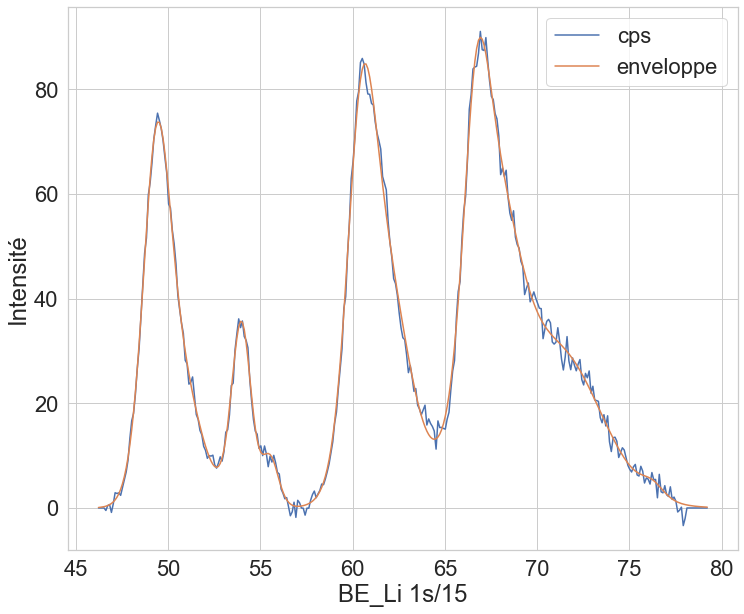

In [82]:
(data.iloc[:,[0,1]]).plot(figsize=(12, 10), legend=True)
plt.ylabel("Intensité")

<AxesSubplot:xlabel='BE_Li 1s/15'>

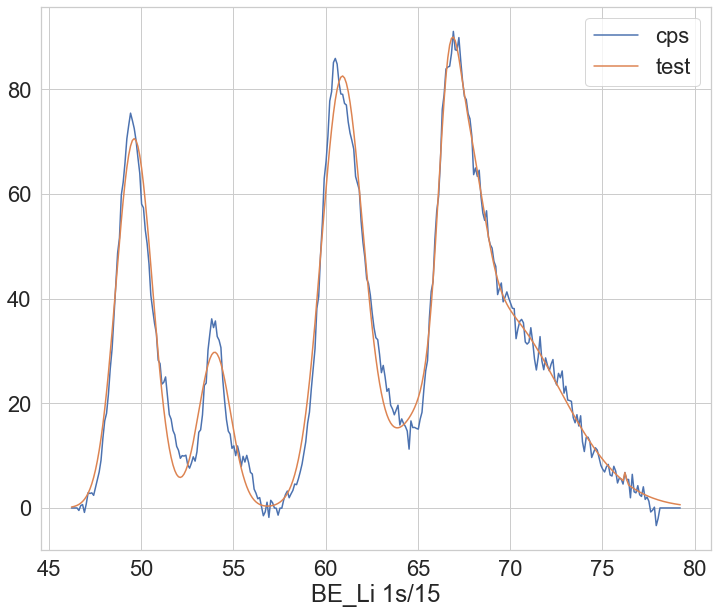

In [83]:
mu=[49,54,56,61,67,72,76]
a=[75,35,10,80,90,30,10]
sigma=[1,1,1,1,1,1,1]
popt, pcov = curve_fit(
    f=somme_gaussiennes,       # model function
    xdata=data["be"],   # x data
    ydata=data["cps"],   # y data
    p0=[a,mu, sigma],      # initial value of the parameters
)

data["test"]=somme_gaussiennes(data["be"],*popt)
(data.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

</br>
</br>
</br>

# VIII. Fichier Thèse Adrien AS11 electrode FIT Silouhette AMIENS2014.TXT

In [84]:
df = pd.read_csv(
    "Thèse Adrien AS11 electrode FIT Silouhette AMIENS2014.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [85]:
df

,KE_Li1s elec,BE_Li1s elec,CPS_Li1s elec,Li 1s Li2CO3_1_Li1s elec,Co 3p_2_Li1s elec,Mn 3p_3_Li1s elec,Co 3p_4_Li1s elec,Mn 3p_5_Li1s elec,Ni 3p Ni2+ Amiens 2014_6_Li1s elec,Ni 3p Ni2+ Amiens 2014_7_Li1s elec,Ni 3p Ni2+ Amiens 2014_8_Li1s elec,Ni 3p Ni3+_9_Li1s elec,Ni 3p Ni3+_10_Li1s elec,Background_Li1s elec,Envelope_Li1s elec
0,1391.16,95.524,738.732,738.732,738.732,738.732,738.732,738.732,738.732,738.732,738.732,738.732,738.732,738.732,738.732
1,1391.26,95.424,723.652,723.652,723.652,723.652,723.652,723.652,723.652,723.652,723.652,723.652,723.652,723.652,723.652
2,1391.36,95.324,746.189,746.189,746.189,746.189,746.189,746.189,746.189,746.189,746.189,746.189,746.189,746.189,746.189
3,1391.46,95.224,747.104,747.104,747.104,747.104,747.104,747.104,747.104,747.104,747.104,747.104,747.104,747.104,747.104
4,1391.56,95.124,722.402,722.402,722.402,722.402,722.402,722.402,722.402,722.402,722.402,722.402,722.402,722.402,722.402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,1440.76,45.924,404.276,404.276,404.276,404.276,404.276,404.285,404.276,404.276,404.276,404.276,404.276,404.276,404.285
497,1440.86,45.824,403.194,403.194,403.194,403.194,403.194,403.199,403.194,403.194,403.194,403.194,403.194,403.194,403.199
498,1440.96,45.724,395.040,395.040,395.040,395.040,395.040,395.043,395.040,395.040,395.040,395.040,395.040,395.040,395.043
499,1441.06,45.624,391.305,391.305,391.305,391.305,391.305,391.307,391.305,391.305,391.305,391.305,391.305,391.305,391.308


In [86]:
ddf = df.set_index("BE_Li1s elec")

In [87]:
data= pd.DataFrame()
CPS=(ddf["CPS_Li1s elec"]- ddf["Background_Li1s elec"])
ENV=(ddf["Envelope_Li1s elec"]- ddf["Background_Li1s elec"])
data["cps"]=CPS
data["enveloppe"]=ENV
data["be"]=data.index

Text(0, 0.5, 'Intensité')

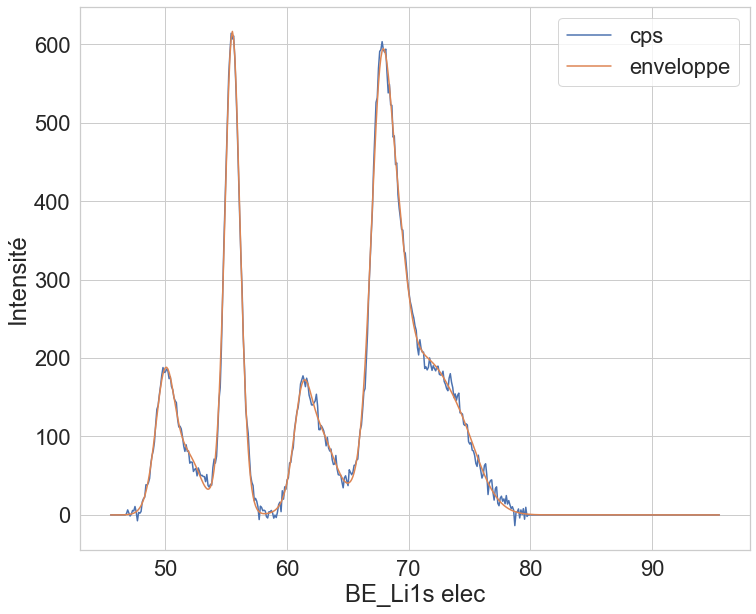

In [88]:
(data.iloc[:,[0,1]]).plot(figsize=(12, 10), legend=True)
plt.ylabel("Intensité")

<AxesSubplot:xlabel='BE_Li1s elec'>

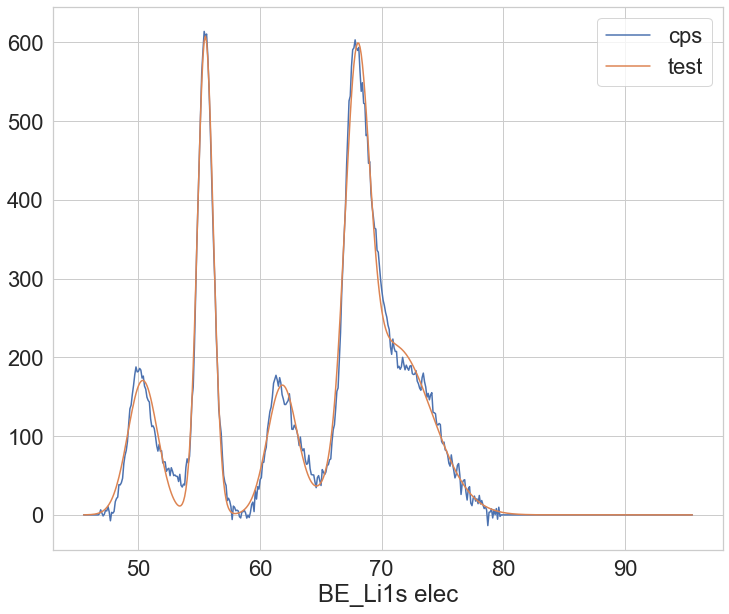

In [89]:
mu=[50,56,61,68,72]
a=[200,600,180,600,200]
sigma=[1,1,1,1,2]
popt, pcov = curve_fit(
    f=somme_gaussiennes,       # model function
    xdata=data["be"],   # x data
    ydata=data["cps"],   # y data
    p0=[a,mu, sigma],      # initial value of the parameters
)

data["test"]=somme_gaussiennes(data["be"],*popt)
(data.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)